In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
os.chdir('C:\\Users\\aravi\Downloads')

In [5]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# 1.Reading dataset

In [6]:
df = pd.read_excel('iris.xls') 

In [7]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2.Data Pre-processing

In [8]:
# to check datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# to check numerical statistics
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#to check no of rows and cols
df.shape

(150, 5)

In [11]:
#to check the null values

df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
#there are null values present in 3 columns 
#so we fill them using mean,median,mode


df['SL'] = df['SL'].fillna(df['SL'].median())
df['SW'] = df['SW'].fillna(df['SW'].median())
df['PL'] = df['PL'].fillna(df['PL'].median())

In [13]:
#all the null are filled using median

df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
# to check for the outliers we take sl,sw,pl,pw as inputs 

num_col = ['SL','SW','PL','PW']


<Axes: >

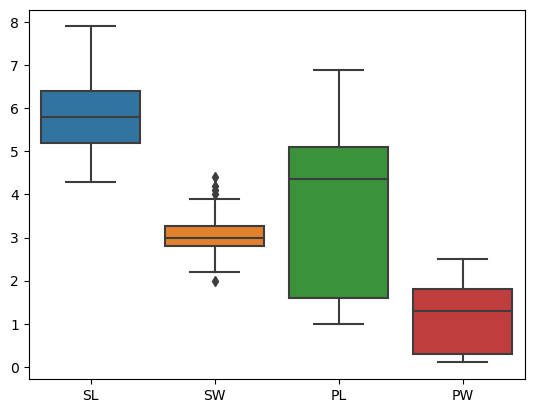

In [15]:
x = df[num_col].values
y = df['Classification'].values   
sns.boxplot(data=df)


In [16]:
#it is found that 'sw'has some outliers

Q1 = np.percentile(df['SW'],25,method = 'midpoint')
Q2 = np.percentile(df['SW'],50,method = 'midpoint')
Q3 = np.percentile(df['SW'],75,method = 'midpoint')

print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)

q1 is 2.8
q2 is 3.0
q3 is 3.25


In [17]:
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

print('IQR is',IQR)
print('low_lim is',low_lim)
print('up_lim is',up_lim)


IQR is 0.4500000000000002
low_lim is 2.1249999999999996
up_lim is 3.9250000000000003


In [18]:
outlier = []
for x in df ["SW"]:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
removed = df["SW"]>up_lim
df.loc[removed].index
df.drop(df.loc[removed].index,inplace = True)

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['Classification'] = le.fit_transform(df['Classification'])

In [22]:
df['Classification']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 146, dtype: int32

In [23]:
df['Classification'].unique()

array([0, 1, 2])

In [24]:
#we seperate the data set into train and test

x = df.drop(['Classification'], axis=1)
y= df['Classification']


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=42)

# Standard Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [45]:
x_train_scaled = scaler.transform(x_train)

In [46]:
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\aravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [47]:
print(accuracy_score(y_test, y_pred))

0.9333333333333333


# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(3, 11)

In [67]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k , metric = 'euclidean')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

In [68]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

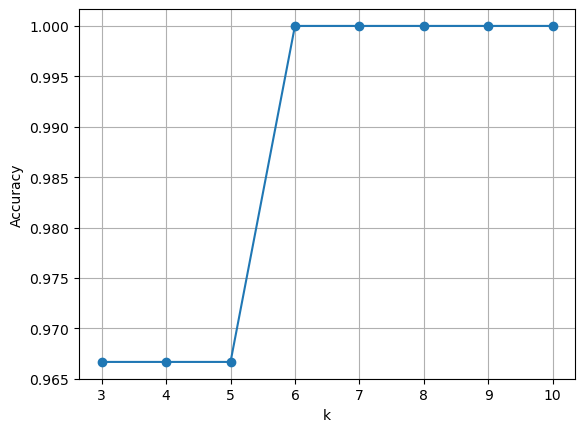

In [69]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [70]:
classifier = KNeighborsClassifier(n_neighbors=8 , metric = 'euclidean')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
metric_k.append(acc)

In [72]:
print(accuracy_score(y_test, y_pred))

1.0


# SVM

In [73]:
from sklearn.svm import SVC

In [74]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train, y_train)
y_pred_svm = svm_cls.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt_cls= DecisionTreeClassifier()
model = dt_cls.fit(x_train, y_train)
y_pred_dt= model.predict(x_test)

In [82]:
accuracy_score(y_test, y_pred_dt)

0.9333333333333333

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_cls= RandomForestClassifier()
model_rf = rf_cls.fit(x_train, y_train)
y_pred_rf= model_rf.predict(x_test)

In [86]:
accuracy_score(y_test, y_pred_rf)

0.9333333333333333

In [ ]:
# from the models performed , the models that gives the best results are KNN and SVM